# Introductory applied machine learning (INFR10069)

# Assignment 3: Object recognition

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

Fill out this notebook, save it, and submit it **and a `.txt` file** (see Part 2) in answer to this assignment.
**You need to submit these two files electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw2 07_Assignment_3.ipynb assignment_3_predictions.txt`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename1=07_Assignment_3.ipynb
local_scp_filepath1=~/git/iaml2017/${filename1}
filename2=assignment_3_predictions.txt
local_scp_filepath2=~/git/iaml2017/${filename2}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath1} ${UUN}@${server_address}:${filename1}
scp -r ${local_scp_filepath2} ${UUN}@${server_address}:${filename2}
# rsync -rl ${local_scp_filepath1} ${UUN}@${server_address}:${filename1}
# rsync -rl ${local_scp_filepath2} ${UUN}@${server_address}:${filename2}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw2 07_Assignment_3.ipynb assignment_3_predictions.txt
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

Include all required imports and execute the cell below. It's typical to include package imports at the top of the file for clarity.

In [1]:
from __future__ import print_function, division
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, log_loss

## Description of the dataset
In this assignment our goal is to recognize objects in images of realistic scenes. There are 19 different classes of object e.g. person, dog, cat, car, etc. The dataset derives from several thousands photographs harvested from the web. Each object of a relevant class has been manually annotated with a bounding box. Images can contain none, one or multiple objects of each class. We have prepared a [website](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) where you can view the images.

We are going to detect whether images contain a person or not - a binary classification problem. To save you time and to make the problem manageable with limited computational resources, we have preprocessed the dataset. We will use the [Bag of Visual Words](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision) representation. Each column of the dataset (which is not an lable), refers to a 'visual word'. Each image is represented by a 500 dimensional vector that contains the normalized count for each of 500 different visual words present in the respective image (a similar representation is used for the spambase dataset, just for real words). See the Appendix at the bottom of the notebook for more information. The image data is thus a $N \times 500$ dimensional matrix where `N` is the number of images.

The full dataset has 520 attributes (dimensions). The first attribute (`imgID`) contains the image ID which allows you to associate a data point with an actual image. The next 500 attributes (`dim1`, ..., `dim500`) are a normalized count vector for each visual word. The last 19 attributes (`is_class`) are the labels - 1 means the class is present in the image. In most of the experiments (unless explicitly noted otherwise) you will only need the `is_person` attribute and the 500 dimensional feature vector. **Do not use the additional class indicator attributes as features** unless explicitly told to do so. 

In Part A we provide you with a training (`train_images partA.csv`) and a validation (`valid_images partA .csv`) dataset. In Part B we provide three data sets: a training set (`train_images partB.csv`), a validation set (`valid_images partB.csv`), and a test set (`test_images partB.csv`). The training and validation set contain valid labels. In the test set the labels are missing. The files are available from the GitHub repository. 

**Important**: *Throughout the assignment you will be given various versions of the dataset that are relevant
to a particular question. Please be careful to use the correct version of the dataset when instructed to do so.
If you use the wrong version of the dataset by mistake no marks will be awarded.*

## 1. Exploration of the dataset [70%]

### ========== Question 1.1 --- [1 mark] ==========
Create two Pandas DataFrame objects called `train_A` and `valid_A` by loading the datasets `train_images_partA.csv` and `valid_images_partA.csv`. Display the number of data points and attributes in each of the two datasets.

In [2]:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_images_partA.csv')
train_A = pd.read_csv(data_path, delimiter = ',')
data_path = os.path.join(os.getcwd(), 'datasets', 'valid_images_partA.csv')
valid_A = pd.read_csv(data_path, delimiter = ',')
print("The train_A dataframe have data points, attributes: ", train_A.shape)
print("The valid_A dataframe have data points, attributes: ", valid_A.shape)

The train_A dataframe have data points, attributes:  (2093, 520)
The valid_A dataframe have data points, attributes:  (1113, 520)


<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: </font>


### ========== Question 1.2 --- [1 mark] ==========
Display and inspect the first 10 instances in the training dataset.

In [3]:
print(train_A[:10])

         imgId      dim1      dim2      dim3      dim4      dim5      dim6  \
0  2008_000008  0.002232  0.000558  0.002790  0.000837  0.001674  0.001953   
1  2008_000015  0.001563  0.000391  0.007422  0.003516  0.003906  0.005078   
2  2008_000019  0.000521  0.000000  0.000000  0.001042  0.001563  0.005729   
3  2008_000023  0.002976  0.002232  0.004464  0.000372  0.000372  0.002232   
4  2008_000028  0.001359  0.000340  0.001359  0.000340  0.001359  0.002038   
5  2008_000033  0.000000  0.006324  0.000372  0.000372  0.000372  0.000372   
6  2008_000036  0.000340  0.000000  0.004416  0.000340  0.000679  0.006114   
7  2008_000037  0.000837  0.002232  0.000279  0.000279  0.000837  0.000000   
8  2008_000041  0.002378  0.001359  0.004755  0.001019  0.003736  0.001359   
9  2008_000045  0.001019  0.000340  0.006454  0.001698  0.001359  0.003736   

       dim7      dim8      dim9      ...       is_cow  is_diningtable  is_dog  \
0  0.001395  0.002232  0.003627      ...            0       

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: </font>


### ========== Question 1.3 --- [1 mark] ==========
Select the attributes (i.e. input features) for training our classifiers. These should be the visual word normalised counts `dim1, dim2, ..., dim500`. Create a list of the **names** of the attributes of interest. 

In [4]:
dim = "dim"
names = []
for i in range(1,501):
    names.append(dim + str(i))

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: </font>


### ========== Question 1.4 --- [1 mark] ==========
By using the list from Question 1.3 now create 4 numpy arrays `X_tr`, `X_val`, `y_tr` and `y_val` in which to store the training features, validation features, training targets, and validation targets, respectively. Your target vectors should correspond to the `is_person` attribute of the training and validation sets. Display the dimensionalities (i.e shapes) of the 4 arrays. 

Check this carefully - you will be penalised in following questions if the data is not correct!

In [5]:
X_tr = train_A[names].values
y_tr = train_A['is_person'].values
X_val = valid_A[names].values
y_val = valid_A['is_person'].values
print("Dimensionality of X_tr: ", X_tr.shape)
print("Dimensionality of y_tr: ", y_tr.shape)
print("Dimensionality of X_val: ", X_val.shape)
print("Dimensionality of y_val: ", y_val.shape)

Dimensionality of X_tr:  (2093, 500)
Dimensionality of y_tr:  (2093,)
Dimensionality of X_val:  (1113, 500)
Dimensionality of y_val:  (1113,)


<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: </font>


### ========== Question 1.5 --- [2 marks] ==========
Create a [countplots](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) for the training and validation targets. Create a single figure, and put the two plots inside the single figure. Label axes appropriately and add a title to your plot. Use descriptive `xticklabels` instead of the default numeric ones.

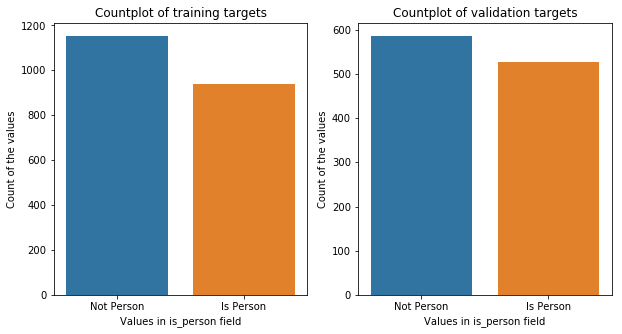

In [6]:
plt.subplots(1,2,figsize=(10,5))
plt.subplot(121)
axl = sns.countplot(y_tr)
axl.set_xticklabels(["Not Person", "Is Person"])
axl.set_title("Countplot of training targets")
axl.set_xlabel("Values in is_person field")
axl.set_ylabel("Count of the values")
plt.subplot(122)
axr = sns.countplot(y_val)
axr.set_xticklabels(["Not Person", "Is Person"])
axr.set_title("Countplot of validation targets")
axr.set_xlabel("Values in is_person field")
axr.set_ylabel("Count of the values")
plt.show()

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: </font>


### ========== Question 1.6 --- [1 mark] ==========
We want to make a baseline classification accuracy to beat. Pick a baseline "dummy" classifier, describe in a sentence why you chose it, and report the accuracy it achieves on the validation set?

A classifier that always pick the most frequent class? Zero R classifier?

I choose it because it's the simplest classifier. The accuracy will be about 50-60%, observed from the above countplot.

In [7]:
print("The accuracy of Zero R classifier: ",accuracy_score(y_val,np.full(len(y_val),0)))

The accuracy of Zero R classifier:  0.526504941599


<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: why the question mark? yes, that's the base one</font>


### ========== Question 1.7 --- [3 marks] ==========
Train a [`LogisticRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier using default settings, except for the `solver` parameter which you should set to `lbfgs`. Report the classification accuracy score on the training and validation sets and compare with the baseline. Comment on the results with 1-2 sentences. You may include any additional plot(s) if you wish to justify your explanation.

In [8]:
lr = LogisticRegression(solver='lbfgs').fit(X_tr,y_tr)
print("Accuracy on training set: ", lr.score(X_tr,y_tr))
print("Accuracy on validation set: ", lr.score(X_val,y_val))

Accuracy on training set:  0.55088389871
Accuracy on validation set:  0.526504941599


<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: additional explanations</font>


Result is very poor, and is exactly the same as baseline.

### ========== Question 1.8 --- [1 mark] ==========
Display the means and standard deviations of the first 5 features in the training set. *Hint: you want to compute the means and standard deviations across the columns of your arrays. Make sure you make appropriate use of the `axis` parameter.*

In [9]:
mean = np.mean(X_tr,0)[:5]
std = np.std(X_tr,0)[:5]
print("The mean of the first 5 features: ",mean)
print("The standard deviation of the first 5 features: ",std)

The mean of the first 5 features:  [ 0.00175058  0.00075592  0.00431695  0.00185278  0.00227248]
The standard deviation of the first 5 features:  [ 0.00119281  0.00140604  0.00369255  0.00134017  0.00159773]


<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: </font>


### ========== Question 1.9 --- [3 marks] ==========
Feature standardisation is a pre-processing technique used to transform data so that they have zero mean and unit standard deviation. For many algorithms, this is a very important step for training models (both regression and classification). Read about [feature standardisation](http://scikit-learn.org/0.17/modules/preprocessing.html) and make sure you understand what kind of transformation this method applies to the data.

`Scikit-learn` offers a [class](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.StandardScaler.html) for feature standardisation. Instansiate a StandardScaler object and fit it using the **training features**. Use this fitted object to transform both your training and validation features to have a standard scale. 

Once your training and validation input data have been transformed, display the means and standard deviations of the first 5 attributes for **both** the training and validation sets. Are the results as you expected? Explain your answer in 2-3 sentences. Why didn't we use the validation set to standardise the data?

**IMPORTANT: You should use the transformed data for the rest of this part.**

In [10]:
scaler = preprocessing.StandardScaler().fit(X_tr)
X_tr = scaler.transform(X_tr)
X_val = scaler.transform(X_val)

mean = np.mean(X_tr,0)[:5]
std = np.std(X_tr,0)[:5]
print("The mean of the first 5 standardized training features: \n\t", mean)
print("The standard deviation of the first 5 standardized training features:  \n\t",std)
mean = np.mean(X_val,0)[:5]
std = np.std(X_val,0)[:5]
print("The mean of the first 5 standardized validation features:   \n\t",mean)
print("The standard deviation of the first 5 standardized validation features:   \n\t",std)

The mean of the first 5 standardized training features: 
	 [ -3.39485301e-17  -2.20665446e-17   2.44429417e-16   1.42583827e-16
  -5.77125012e-17]
The standard deviation of the first 5 standardized training features:  
	 [ 1.  1.  1.  1.  1.]
The mean of the first 5 standardized validation features:   
	 [-0.00550612 -0.0382933   0.10915098  0.09369314  0.03057844]
The standard deviation of the first 5 standardized validation features:   
	 [ 1.01310886  0.96981949  1.0492285   1.05684479  0.97471336]


The standard deviation is reduced to 1, and the mean is very small, almost 0.

The validation data have mean and standard deviation very close to 0 and 1. Because the training data and validation data is similar. 

We don't use the validation set's mean and std to standardize because we want to get a 
better estimate of the unseen data, not just a estimate of sample.

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: </font>


### ========== Question 1.10 --- [3 marks] ==========
By using the transformed input data, train a new `LogisticRegression` classifier. Again, set the `solver` parameter to `lbfgs` and use default settings for the other parameters. Report the classification accuracy on both the training and validation sets.

Comment on how your model compares to the baseline classifier from Question 1.6? You may use additional plot(s) to support your explanation.

In [11]:
lr = LogisticRegression(solver='lbfgs').fit(X_tr,y_tr)
print("Accuracy on training set: ", lr.score(X_tr,y_tr))
print("Accuracy on validation set: ", lr.score(X_val,y_val))

Accuracy on training set:  0.810797897754
Accuracy on validation set:  0.643306379155


It gives a much higher accuracy now, higher than baseline but still is very low.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: explanations needed</font>


### ========== Question 1.11 --- [1 mark] ==========
So far we have used default settings for training the logistic regression classifier. Now, we want to use [K-fold cross-validation](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.KFold.html) to optimise the regularisation parameter `C`. The regularisation parameter controls the degree to which we wish to penalise large magnitudes in the weight vector. This can help us prevent overfitting but, if set too high, could lead us to underfit too.

Create a 3-fold cross-validation object. Set the `shuffle` parameter to `True` and the `random_state` to `0`. By using the cross-validation iterator, display the number of test samples for each fold.

In [12]:
kf = KFold(n_splits=3, shuffle=True, random_state=0)
for train_index, test_index in kf.split(X_tr):
    print("Test length:", len(test_index))

Test length: 698
Test length: 698
Test length: 697


<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: </font>


### ========== Question 1.12 --- [2 marks] ========== 
Using the cross-validation iterator from the previous question, perform a search for the best value for `C`. 

We are going to loop over each CV fold, and each value of `C`. The values of `C` to search should be 20 equally-spaced values **in log space** ranging from `1e-5` to `1e5` *(hint: look at the `logspace()` function in numpy)*. 

Create a 2-dimensional array and, for each cross-validation fold and parameter setting pair, compute and store the classification accuracy score e.g. store the score of fold 0 with parameter setting 1 at score_array[0,1]. As previously, set the `solver` parameter to `lbfgs` and use default settings for the other parameters (except for `C` obviously!).

*(hint: you could use two loops in your code; one iterating over CV folds and another one iterating over the values for `C`)*. 

In [13]:
ls = np.logspace(-5,5,20)
scores = []
for train_index, test_index in kf.split(X_tr):
    score = []
    for c in ls:
        lr = LogisticRegression(solver='lbfgs',C=c).fit(X_tr[train_index],y_tr[train_index])
        score.append(lr.score(X_tr[test_index],y_tr[test_index]))
    scores.append(score)
print(np.mean(scores,0))

[ 0.5556581   0.63210868  0.66840628  0.68226154  0.69898761  0.71045852
  0.68609431  0.67176218  0.65695456  0.64643944  0.64118086  0.63735699
  0.63305831  0.63258076  0.63258076  0.63305831  0.6321032   0.6321032
  0.63353587  0.63305831]


<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: </font>


### ========== Question 1.13 --- [1 mark] ========== 
Plot the mean classification performance (across CV folds) of the logistic regression classifier against the regularisation parameter `C` by using the range from Question 1.12. Use a logarithmic scale for the x-axis and label both axes appropriately. 

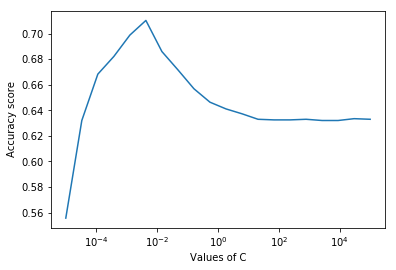

In [14]:
plt.semilogx(ls,np.mean(scores,0))
plt.xlabel("Values of C")
plt.ylabel("Accuracy score")
plt.show()

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: </font>


### ========== Question 1.14 --- [2 marks] ==========
Display the optimal value for the regularisation parameter `C` determined by the search results from Question 1.12. Similarly to Question 1.13, consider the mean classifiation accuracy across CV folds. By using the optimal value (i.e. the one that yields the highest average classification accuracy) train a new `LogisticRegression` classifier and report the classification accuracy on the validation set. *(Hint: Do not pick the optimal value "by hand", instead use an appropriate numpy function).*

In [15]:
print("Optimal C is: ", ls[np.argmax(np.mean(scores,0))])
lr = LogisticRegression(solver='lbfgs',C=ls[np.argmax(np.mean(scores,0))]).fit(X_tr,y_tr)
print("Accuracy Score: ", lr.score(X_val,y_val))

Optimal C is:  0.00428133239872
Accuracy Score:  0.696316262354


<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: </font>


### ========== Question 1.15 --- [1 mark] ========== 
Scikit-learn offers a [`LogisticRegressionCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) module which implements Logistic Regression with builtin cross-validation to find out the optimal `C` parameter. You can specify the range for the `C` parameter, as well as the cross-validation method you want to use with the `Cs` and `cv` parameters, respectively. Use the `C` range you set up in Question 1.12 and the 3-fold cross-validation iterator from Question 1.11. Once again, train the models by using the `lbfgs` optimisation method and display the optimal value for the parameter `C`. Finally, display the classification accuracy on the validation set. Check your results are consistent with those from Question 1.14!

In [16]:
lrcv = LogisticRegressionCV(solver='lbfgs',Cs=ls).fit(X_tr,y_tr)
print("Accuracy Score: ", lrcv.score(X_val,y_val))

Accuracy Score:  0.696316262354


<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: </font>


### ========== Question 1.16 --- [1 mark] ==========
Now, we want to validate the importance of various features for classification. For this purpose, we will use a [`RandomForestClassifier`](http://scikit-learn.org/0.17/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (you might want to refer to Lab_3 if you are unsure how we can estimate feature importances with decision tree and random forest models).

Initialise a random forest classifier and fit the model by using training data only and 500 trees (i.e. `n_estimators`). Set the `RandomState` equal to 42 to ensure reproducible results. Report the accuracy score on both the training and validation sets.

In [17]:
rf = RandomForestClassifier(n_estimators=500,random_state=42).fit(X_tr,y_tr)
print("Training Accuracy Score: ", rf.score(X_tr,y_tr))
print("Validation Accuracy Score: ", rf.score(X_val,y_val))

Training Accuracy Score:  1.0
Validation Accuracy Score:  0.692722371968


<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: </font>


### ========== Question 1.17 --- [2 marks] ==========
Comment on the results above. Do you find the discrepancy between training and validation accuracies surprising?

Not really? Decision Trees overfit on training data, so it get 100% accuracy score.

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: better explanations needed </font>


### ========== Question 1.18 --- [2 marks] ==========
By using the random forest model from the previous question order the features by descending importance and display the names of the 50 most important features.

In [18]:
fis = np.vstack((names,rf.feature_importances_)).T
print(np.flip(fis[fis[:,1].argsort()],0)[:50,:])

[['dim21' '0.00757195057013']
 ['dim51' '0.00755943221497']
 ['dim360' '0.00703154028838']
 ['dim4' '0.006192970537']
 ['dim479' '0.00605406750455']
 ['dim76' '0.00602620868388']
 ['dim283' '0.00581056195777']
 ['dim461' '0.00560584890536']
 ['dim343' '0.00545133226507']
 ['dim398' '0.00485916109112']
 ['dim348' '0.00478323052424']
 ['dim74' '0.00474192781298']
 ['dim485' '0.004716045279']
 ['dim356' '0.00470221813828']
 ['dim330' '0.00464009536507']
 ['dim217' '0.00460583757878']
 ['dim263' '0.00457740415797']
 ['dim222' '0.00421813280535']
 ['dim134' '0.00413136545819']
 ['dim500' '0.00406379480242']
 ['dim274' '0.00404162520612']
 ['dim254' '0.00400195792221']
 ['dim206' '0.00388999587352']
 ['dim423' '0.00386738528953']
 ['dim347' '0.00381305997817']
 ['dim17' '0.00372777792295']
 ['dim326' '0.00370432369558']
 ['dim90' '0.00370317266118']
 ['dim92' '0.00370079881013']
 ['dim329' '0.00368721036265']
 ['dim214' '0.00366764591427']
 ['dim322' '0.00361343387665']
 ['dim289' '0.0035953

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: </font>


### ========== Question 1.19 --- [3 marks] ==========
Next, we would like to test the performance of support vector machines. Train three support vector classifiers with the following kernels: linear, radial basis function, and polynomial. Report the classification accuracy of each of the three classifiers on both the training and validation sets.

In [19]:
svc1 = SVC(kernel='linear').fit(X_tr,y_tr)
print("LINEAR Score on training data: ",svc1.score(X_tr,y_tr))
print("LINEAR Score on validation data: ",svc1.score(X_val,y_val))
svc2 = SVC(kernel='rbf').fit(X_tr,y_tr)
print("RBF Score on training data: ",svc2.score(X_tr,y_tr))
print("RBF Score on validation data: ",svc2.score(X_val,y_val))
svc3 = SVC(kernel='poly').fit(X_tr,y_tr)
print("POLY Score on training data: ",svc3.score(X_tr,y_tr))
print("POLY Score on validation data: ",svc3.score(X_val,y_val))

LINEAR Score on training data:  0.842331581462
LINEAR Score on validation data:  0.638814016173
RBF Score on training data:  0.910654562828
RBF Score on validation data:  0.729559748428
POLY Score on training data:  0.990922121357
POLY Score on validation data:  0.701707097934


<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: </font>


### ========== Question 1.20 --- [3 marks] ==========
At this point, we would like to get an idea of what kind of decision boundaries we can get with the three types of SVM kernels we introduced in the previous question. For visualisation, however, we can only make use of 2D input data. For this purpose, we select to use the 21st and 76th columns of our training features (*hint: remember that Python uses 0-based indexing*). 

Execute the cell below to define a useful function which we will be using to plot the decision boundaries *(it is also not a bad idea to try to understand what this functions does)*. 

Then train three distinct SVM classifiers by using the 2D input data mentioned above and default parameters:
* a linear SVC
* an RBF SVC 
* a polynomial SVC

Finally, create a list containing the three classifiers you have just trained. Use this list as an input to the provided function along with the used training features and observe the outcome. You can use the additional `title` parameter to set the titles in the subplots. Comment on the shape of the boundaries and what this means for classification accuracy in 1-2 sentences.

*(Acknowledgement: this Question has been heavily based on [this example](http://scikit-learn.org/0.17/auto_examples/svm/plot_iris.html) from scikit-learn's documentation.)*

In [20]:
def show_svc_decision_boundaries(clfs, X, title=None):
    """Plots decision boundaries for classifiers with 2D inputs.
    
    Parameters
    ----------
    clf : list
        Classifiers for which decision boundaries will be displayed.
    X : array
        Input features used to train the classifiers.
    title : list, optional
        Titles for classifiers.
    
    """
    
    assert X.shape[1] == 2 # Input should be 2D
    if title is not None:
        assert len(clfs) == len(title)
    
    h = .04 # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    plt.figure(figsize=(15,5))
    for i, clf in enumerate(clfs):
        plt.subplot(1, len(clfs), i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        # Training points
        plt.scatter(X[:, 0], X[:, 1], c=y_tr, cmap=plt.cm.Paired)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        if title is not None:
            plt.title(title[i])

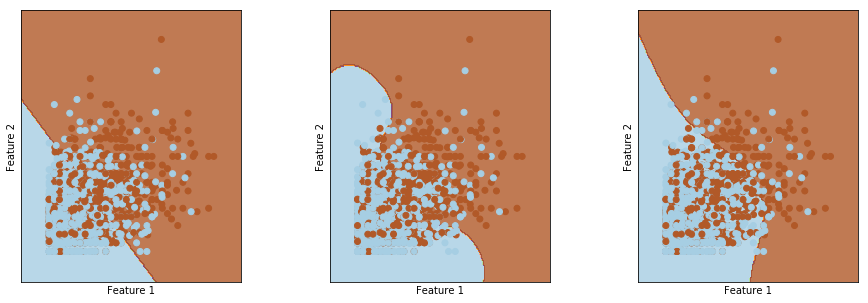

In [21]:
X_tr_2 = X_tr[:,[20,75]]
svc4 = SVC(kernel='linear').fit(X_tr_2,y_tr)
svc5 = SVC(kernel='rbf').fit(X_tr_2,y_tr)
svc6 = SVC(kernel='poly').fit(X_tr_2,y_tr)
show_svc_decision_boundaries([svc4,svc5,svc6],X_tr_2)

They give similar decision areas, however the boundaries are different.

Linear SVM got ..linear decision boundary, while other 2 get non-linear ones.

RBF tend to give round boundaries, because it's 'radial' based function?

Polynomial SVM gives a polynomial shaped decision boundary.

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: </font>


### ========== Question 1.21 --- [5 marks] ==========
So far we have used default parameters for training the SVM classifiers. Now we want to tune the parameters by using cross-validation. 

By using the `K-fold` iterator from Question 1.11 and training data only, estimate the classification accuracy of an SVM classifier with RBF kernel, while you vary the penalty parameter `C` in a logarithmic range `np.logspace(-2, 3, 10)`. Set the kernel coefficient parameter `gamma` to `auto` for this question. 

Plot the mean cross-validated classification accuracy against the regularisation parameter `C` by using a log-scale for the x-axis. Display the highest obtained mean accuracy score and the value of `C` which yielded it. Label axes appropriately. 

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

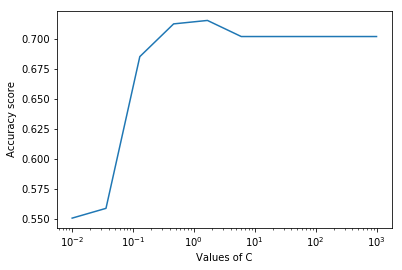

Optimal C is:  1.6681005372 , with accuracy score: 0.715230644637
Accuracy Score on Training Set:  0.974677496417
Accuracy Score on Validation Set:  0.727762803235


In [22]:
ls2 = np.logspace(-2,3,10)
scores = []
for train_index, test_index in kf.split(X_tr):
    score = []
    for c in ls2:
        svc7 = SVC(kernel='rbf',gamma='auto',C=c).fit(X_tr[train_index],y_tr[train_index])
        score.append(svc7.score(X_tr[test_index],y_tr[test_index]))
    scores.append(score)
plt.semilogx(ls2,np.mean(scores,0))
plt.xlabel("Values of C")
plt.ylabel("Accuracy score")
plt.show()
print("Optimal C is: ", ls2[np.argmax(np.mean(scores,0))], ", with accuracy score:", np.max(np.mean(scores,0)))
svc8 = SVC(kernel='rbf',gamma='auto',C=ls2[np.argmax(np.mean(scores,0))]).fit(X_tr,y_tr)
print("Accuracy Score on Training Set: ", svc8.score(X_tr,y_tr))
print("Accuracy Score on Validation Set: ", svc8.score(X_val,y_val))

<font color='red'>TASK MARK: 4</font>
<br>
<font color='green'>COMMENT: </font>


### ========== Question 1.22 --- [5 marks] ==========
Now we turn to the kernel coefficient `gamma` parameter. By using the same procedure as in the previous question, estimate the classification accuracy of an SVM classifier with RBF kernel while you vary the `gamma` parameter in a logarithmic range `logspace(-5, 0, 10)`. Fix the penalty parameter `C=1.0`.

Plot the mean cross-validated classification accuracy against the parameter `gamma` by using a log-scale for the x-axis. Display the highest obtained mean accuracy score and the value of `gamma` which yielded it.  Label axes appropriately.

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

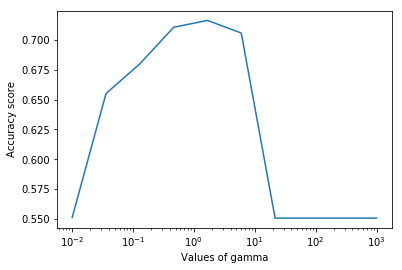

Optimal gamma is:  0.0016681005372 , with accuracy score: 0.716185754475
Accuracy Score on Training Set:  0.891065456283
Accuracy Score on Validation Set:  0.726864330638


In [23]:
ls3 = np.logspace(-5,0,10)
scores = []
for train_index, test_index in kf.split(X_tr):
    score = []
    for g in ls3:
        svc7 = SVC(kernel='rbf',gamma=g,C=1).fit(X_tr[train_index],y_tr[train_index])
        score.append(svc7.score(X_tr[test_index],y_tr[test_index]))
    scores.append(score)
plt.semilogx(ls2,np.mean(scores,0))
plt.xlabel("Values of gamma")
plt.ylabel("Accuracy score")
plt.show()
print("Optimal gamma is: ", ls3[np.argmax(np.mean(scores,0))], ", with accuracy score:", np.max(np.mean(scores,0)))
svc8 = SVC(kernel='rbf',gamma=ls3[np.argmax(np.mean(scores,0))],C=1).fit(X_tr,y_tr)
print("Accuracy Score on Training Set: ", svc8.score(X_tr,y_tr))
print("Accuracy Score on Validation Set: ", svc8.score(X_val,y_val))

<font color='red'>TASK MARK: 4</font>
<br>
<font color='green'>COMMENT: </font>


### ========== Question 1.23 --- [7 marks] ==========
Now we wish to tune both the `C` and `gamma` parameters simultaneously. To save computational time, we will now constrain the parameter search space. Define a `4 X 4` grid for the two parameters, as follows:
* `C`: `np.logspace(-2, 1, 4)`
* `gamma`: `np.logspace(-4, -1, 4)`

Estimate the mean cross-validated classification accuracy by using training data only and all possible configurations for the two parameters. 

Use a [heatmap](https://seaborn.github.io/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap) to visualise the mean cross-validated classification accuracy for all `C`-`gamma` pairs. Label axes appropriately and display the values for `C` and `gamma` for the best performing configuration. 

Finally, by using the optimal configuration, train a classifier (without using cross-validation) and report the classification accuracy on the training and validation sets.

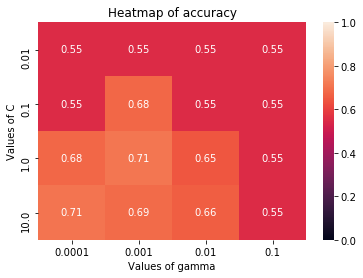

Optimal (gamma, C) is: ( 0.001 ,  1.0 ), with accuracy score: 0.712362574494
Accuracy Score on Training Set:  0.834687052078
Accuracy Score on Validation Set:  0.721473495058


In [24]:
ls4 = np.logspace(-2,1,4)
ls5 = np.logspace(-4,-1,4)
scores = []
for c in ls4:
    score = []
    for g in ls5:
        avs = []
        for train_index, test_index in kf.split(X_tr):
            svc7 = SVC(kernel='rbf',gamma=g,C=c).fit(X_tr[train_index],y_tr[train_index])
            avs.append(svc7.score(X_tr[test_index],y_tr[test_index]))
        score.append(np.average(avs))
    scores.append(score)
sns.heatmap(scores,xticklabels=ls5, yticklabels=ls4, vmin=0., vmax=1., annot=True)
plt.xlabel("Values of gamma")
plt.ylabel("Values of C")
plt.title("Heatmap of accuracy")
plt.show()
index = np.unravel_index(np.argmax(scores),(4,4))
print("Optimal (gamma, C) is: (", ls5[index[1]], ", ", ls4[index[0]], "), with accuracy score:", scores[index[0]][index[1]])
svc8 = SVC(kernel='rbf',gamma=ls5[index[1]],C=ls4[index[0]]).fit(X_tr,y_tr)
print("Accuracy Score on Training Set: ", svc8.score(X_tr,y_tr))
print("Accuracy Score on Validation Set: ", svc8.score(X_val,y_val))

<font color='red'>TASK MARK: 6</font>
<br>
<font color='green'>COMMENT: </font>


### ========== Question 1.24 --- [3 marks] ==========
Is the classification accuracy on the validation set higher than in previous questions (1.22-1.23)? If not, can you explain why? Can you think of a way of further improving the performance of the classifier? You don't need to implement your suggestion at this stage. Would there be any associated problems with your suggested approach? 

It's lower than both of the previous questions. It's because a small amount of logspace is used, only 4x4.

The classifier could be improved if we test more values of gamma and C. Or after finding a range of gamma and C giving a higher accuracy, we reduce the minimum and maximum of logspace, trying to find a more accurate choice in the range. But it would cost a lot more time due to the computational cost.

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: </font>


### ========== Question 1.25 --- [5 marks] ==========
Now we want to evaluate the performance of an SVM classifier with polynomial kernel. Once again, we will tune the `degree` parameter by using cross-validation (similarly to what we did in Questions 1.21 and 1.22).

By using the `K-fold` iterator from Question 1.11 and training data only, estimate the classification accuracy of polynomial SVM classifier, while you vary the `degree` parameter in the range `np.arange(1,8)`. 

Plot the mean cross-validated classification accuracy against the polynomial degree. Display the highest obtained mean accuracy score and the value of the `degree` parameter which yielded it. Label axes appropriately. 

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

Accuracy Score on Training Set:  0.783564261825
Accuracy Score on Validation Set:  0.689128481581


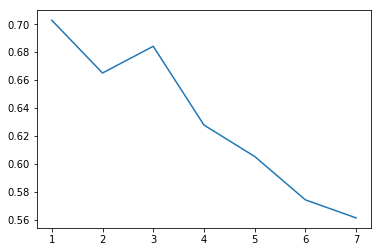

In [25]:
scores = []
for train_index, test_index in kf.split(X_tr):
    score = []
    for i in np.arange(1,8):
        svc9 = SVC(kernel='poly',degree=i).fit(X_tr[train_index],y_tr[train_index])
        score.append(svc9.score(X_tr[test_index],y_tr[test_index]))
    scores.append(score)
best_value = np.argmax(np.mean(scores,0)) + 1

plt.plot(np.arange(1,8),np.mean(scores,0))
svc9 = SVC(kernel='poly',degree=best_value).fit(X_tr,y_tr)
print("Accuracy Score on Training Set: ", svc9.score(X_tr,y_tr))
print("Accuracy Score on Validation Set: ", svc9.score(X_val,y_val))

<font color='red'>TASK MARK: 4</font>
<br>
<font color='green'>COMMENT: </font>


### ========== Question 1.26 --- [4 marks] ==========

You might have noticted that so far, we have used cross-validation for optimising the various tuning parameters (e.g. regularisation parameter in logistic regression, SVM kernel parameters) rather than hold-out validation, although we did have access to a validation set. Why do you think this is a good/bad idea? Give one advantage and one disadvantage of the two different approaches. Which one would you trust more in practice?

I think it's good because it utilizes the whole training dataset. It puts every point into both training and testing, reduces effects on bad split of the data. But it increases the time used for computation, it tooks minutes on a small dataset, training on huge dataset would cost a lot of time. I would trust the cross-validation more in practice.


<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: </font>


### ========== Question 1.27 --- [6 marks] ==========

Reload the full training and validation data that contain all indicator variables for all object categories. Remove the `imgId` attribute but keep all of the class indicator variables in the dataset this time. Your training features should include all attributes except `is_person` which should be your target variable. 

Once again, use a [StandardScaler](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.StandardScaler.html) to standardise your training and validation features. Then train a Random Forest Classifier by using the entropy `criterion`, 500 `n_estimators`, and also set the `random_state` to 31. Report the classification accuracy on the training and validation sets.

Similarly to what we did in Question 1.18, order the features by decreasing importance and display the 50 most important features. 

Finally, answer the following questions:
* What do you notice by looking at the list of the best 50 features?
* How does the performance differ with respect to the case when the additional class indicator variables are not present (Question 1.16)? Relate your observations to the observed feature ranking.
* Would it be easy to make use of the results in practice? Briey explain your reasoning.

*(Hint: you might want to look at some of the [images](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) to justify your explanations.)*

In [26]:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_images_partA.csv')
train_A = pd.read_csv(data_path, delimiter = ',')
data_path = os.path.join(os.getcwd(), 'datasets', 'valid_images_partA.csv')
valid_A = pd.read_csv(data_path, delimiter = ',')

X_tr = train_A.drop(['imgId','is_person'],1).values
y_tr = train_A['is_person'].values
X_val = valid_A.drop(['imgId','is_person'],1).values
y_val = valid_A['is_person'].values

scaler = preprocessing.StandardScaler().fit(X_tr)
X_tr = scaler.transform(X_tr)
X_val = scaler.transform(X_val)

rf = RandomForestClassifier(n_estimators=500,random_state=31).fit(X_tr,y_tr)
print("Training Accuracy Score: ", rf.score(X_tr,y_tr))
print("Validation Accuracy Score: ", rf.score(X_val,y_val))

fis = np.vstack((train_A.drop(['imgId','is_person'],1).columns,rf.feature_importances_)).T
print(np.flip(fis[fis[:,1].argsort()],0)[:50,:])

Training Accuracy Score:  1.0
Validation Accuracy Score:  0.719676549865
[['is_cat' 0.008605303352642672]
 ['is_bird' 0.008317672720200418]
 ['dim21' 0.00798869701648015]
 ['dim51' 0.007202549448590314]
 ['dim360' 0.006533707426533113]
 ['dim76' 0.006491311432139404]
 ['dim479' 0.005844123596702115]
 ['dim4' 0.0055130693734297695]
 ['dim398' 0.005441884601066743]
 ['dim461' 0.005088981597086518]
 ['dim283' 0.0049169911409840976]
 ['dim330' 0.004817993855914907]
 ['dim485' 0.004816893404133796]
 ['dim423' 0.004735415962980522]
 ['dim343' 0.0047293225841903335]
 ['dim348' 0.004681648916618782]
 ['dim217' 0.004489958432761101]
 ['dim222' 0.004384106684497792]
 ['dim74' 0.0043490787166436526]
 ['dim274' 0.00433192523837147]
 ['dim90' 0.0043154490177319035]
 ['dim288' 0.004270946514708666]
 ['dim214' 0.004245126438644598]
 ['dim356' 0.004060979437575156]
 ['dim263' 0.004058322704116325]
 ['dim254' 0.003957240406787233]
 ['dim500' 0.0038255905543174555]
 ['dim483' 0.003770016954187141]
 ['di

'is_cat' and 'is_bird' enters the list. It performs a lot better, since these 2 feature have a very high ranking, they offered a lot information about whether there is a person or not. (Whenever the picture is a cat or a bird, there won't be people in the photo.

I don't think it will be easy to use these in practice, because the prediction on cats and bird may be inaccurate, causing the classifier to have a lower accuracy. 

<font color='red'>TASK MARK: 4</font>
<br>
<font color='green'>COMMENT: could explain better</font>


## Mini challenge [30%]

*Important: You are allowed to write up to a maximum of 600 words in this part of the assignment. The thoroughness of the exploration and the quality of the resulting discussion is just as important as the final classification performance of your chosen method(s) and credit will be divided accordingly.*

In this final part of the assignment we will have a mini object-recognition challenge. Using the data provided you are asked to find the best classiffier for the person/no person classification task. You can apply any preprocessing steps to the data that you think fit and employ any classifier you like (with the provison that you can explain what the classifier is/preprocessing steps are doing). You can also employ any lessons learnt during the course, either from previous Assignments, the Labs or the lecture material to try and squeeze out as much performance as you possibly can. The only restriction is that all steps must be performed in `Python` by using the `numpy`, `pandas` and `sklearn` packages. You can also make use of `matplotlib` and `seaborn` for visualisation. 

**Important:** The classification performance metric that we will use for this part is the *cross-entropy* or *logarithmic loss* (see Lab 4). You should familiarise yourself with the metric by reading the `sklearn` [user guide](http://scikit-learn.org/0.17/modules/model_evaluation.html#log-loss) and [documentation](http://scikit-learn.org/0.17/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss). To estimate this metric you will need to evaluate probability outputs, as opposed to discrete predictions which we have used so far to compute classification accuracies. Most models in `sklearn` implement a `predict_proba()` method which returns the probabilities for each class. For instance, if your test set consists of `N` datapoints and there are `K` classes, the method will return a `N` x `K` matrix.

We provide you with three new data sets: a training set (`train_images_partB.csv`), a validation set (`valid_images_partB.csv`), and a test set (`test_images_partB.csv`). You must use the former two for training and evaluating your models (as you see fit). Once you have chosen your favourite model (and pre-processing steps) you should apply it to the test set (for which no labels are provided). Estimate the posterior proabilities for the data points in the test set and submit your results as part of your answer. Your results will be evaluated in terms of the logarithmic loss metric. You also need to submit a brief description of the approaches you considered, your suggested final approach, and a short explanation of why you chose it. The thoroughness of the exploration and the quality of the resulting discussion is just as important as the final score of your chosen method(s) and credit will be divided accordingly.

*Hint: Feature engineering, feature combination, model combination and model parameter optimization can significantly improve performance.*

**How to submit your results**: Store the estimated probabilities for the data points in the test set in a 2D numpy array. Then execute the provided cell at the end of this notebook which uses a provided `save_predictions` function to export your results into a `.txt` file (the function will return an error if the provided array has not the right shape). The `.txt` file will be saved where your notebook lives. Submit this file along with your notebook as detailed at the top of this file.

---

To find the best classifier, we will try different classifiers, including:
    [ Logistic Regression, Random Forest, SVM with linear, RBF, and polynomial kernel ]
    
To ensure the reproduciable results, we fix the random_state of all classifier to 420.
To make full use of the training data, a K_fold of 3 times is used, again, the random_state is set to 0 to ensure reproducible results. I could use a higher number of K, but the computational time is too long.

As stated in question 1.9, it's very important to do feature standardisation, which transform the data to have zero mean and unit standard deviation, before processing data. It's also vital to use training data's scale to standardize validation and testing data.

After standardizing, we look at the means and standard deviantion of the transformed data. The transformed training data have a (mean, std) pair close to (0, 1). But both validation data and testing data have (mean, std) of about (-0.08, 0.0037). This means that the validation and testing data are similar to each other, but they both differ from training data. That allows us to use the performance on validation dataset to estimate the testing cross-entropy. 

Then, we try to fit a dummy classifier, using the prior baseline from lab 3. We get a cross-entropy of WHAT, it means we could remove classifiers giving a higher validation cross-entropy than WHAT.

Firstly, using a logspace of (-5,5,20), we try to find the optimal C for logistic regression with K-fold, then we use C that gives the lowest cross-entropy to fit a new logistic regression model. This gives a cross-entropy of 0.598 on validation dataset.

The Random Forest classifier is rather straightforward, it gives a cross-entropy of 0.585.

The Linear SVM will perform badly given the nature of the task, and it gives a cross-entropy of 0.692, slightly lower than the baseline.

Then it's the RBF SVM, since we need to find an optimal pair of gamma and C, it will take a very long time to find the optimal pair among all the lesser ones. To reduce computational time, I start by setting the logspace of both gamma and C to (-5,5,3). Use 3x3 to save time. Then I reduce the minimum and maximum of the logspace to an area with low overall entropy. I did this multiple rounds to found the optimal pair of (C, gamma), which is (1, 100). This gives a cross-entropy of 0.564 on validation dataset.

Lastly, the polynomial SVM, using a degree of range 1-10, we found that the best degree is 8, but only gives a cross-entropy of 0.693, even worse than the linear SVM.

Then we pick the classifier that gives the lowest cross-entropy on validation set (hopefully testing set), and output the predict probability on testing features.

 
---

In [27]:
#Loading the dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'train_images_partB.csv')
train_B = pd.read_csv(data_path, delimiter = ',')
data_path = os.path.join(os.getcwd(), 'datasets', 'valid_images_partB.csv')
valid_B = pd.read_csv(data_path, delimiter = ',')
data_path = os.path.join(os.getcwd(), 'datasets', 'test_images_partB.csv')
test_B = pd.read_csv(data_path, delimiter = ',')

#Generate X and y
dim = "dim"
names = []
for i in range(1,501):
    names.append(dim + str(i))
X_tr = train_B[names].values
y_tr = train_B['is_person'].values
X_val = valid_B[names].values
y_val = valid_B['is_person'].values
X_test = test_B[names].values

#Collect a list of winners
classifiers = []
classifiers_description = []
classifiers_ce = []

#mean = np.mean(X_tr,0)[:5]
#std = np.std(X_tr,0)[:5]
#print("The mean of the first 5 training features:\n\t",mean)
#print("The standard deviation of the first 5 training features:\n\t",std)
#mean = np.mean(X_val,0)[:5]
#std = np.std(X_val,0)[:5]
#print("The mean of the first 5 validation features:\n\t",mean)
#print("The standard deviation of the first 5 validation features:\n\t",std)

#Standardize the data
scaler = preprocessing.StandardScaler().fit(X_tr)
X_tr = scaler.transform(X_tr)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#Compare the training/validation dataset
mean = np.mean(X_val)
std = np.mean(np.std(X_val,0))
print("The mean mean of the standardized validation features:   \n\t",mean)
print("The mean standard deviation of the standardized validation features:   \n\t",std)

The mean mean of the standardized validation features:   
	 -0.084541122257
The mean standard deviation of the standardized validation features:   
	 0.00370470710669


In [28]:
#Compare the training/testing dataset
mean = np.mean(X_test)
std = np.mean(np.std(X_test,0))
print("The mean mean of the standardized testing features:   \n\t",mean)
print("The mean standard deviation of the standardized testing features:   \n\t",std)

The mean mean of the standardized testing features:   
	 -0.0845408267277
The mean standard deviation of the standardized testing features:   
	 0.00379238653936


In [29]:
#The mean of the validation set seems rather.. different.
#Continue anyways (probably should combine them and resplit)
#Try the dummy classifier with prior strategy baseline.
dummy = DummyClassifier(strategy='prior').fit(X_tr,y_tr)
#print("The accuracy of Dummy classifier: ", dummy.score(X_tr,y_tr))
ce_dummy_tr = log_loss(y_tr,dummy.predict_proba(X_tr))
ce_dummy_val = log_loss(y_val,dummy.predict_proba(X_val))
print("The cross-entropy of Dummy classifier, on training set: ", ce_dummy_tr)
print("The cross-entropy of Dummy classifier, on validation set: ", ce_dummy_val)

The cross-entropy of Dummy classifier, on training set:  0.687766472389
The cross-entropy of Dummy classifier, on validation set:  0.693033324787


In [30]:
#Initialize K-fold, with 5 iteration.
kf = KFold(n_splits=3, shuffle=True, random_state=0)

/afs/inf.ed.ac.uk/user/s14/s1413557/miniconda2/envs/iaml/lib/python2.7/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Logistic Regression with Optimal C is okay, with log_loss:  0.598093795536


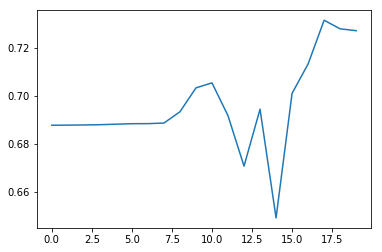

In [31]:
#Then tries logistic regression, with lgbfs solver.
ls = np.logspace(-5,5,20)

scores = []
for train_index, test_index in kf.split(X_tr):
    score = []
    for l in ls:
        lr = LogisticRegression(solver='lbfgs',C=l).fit(X_tr[train_index],y_tr[train_index])
        score.append(log_loss(y_tr[test_index],lr.predict_proba(X_tr[test_index])))
    scores.append(score)

plt.plot(np.arange(0,20),np.mean(scores,0))
index = np.argmin(np.mean(scores,0))

lr = LogisticRegression(solver='lbfgs',C=ls[index]).fit(X_tr,y_tr)
ce_lr_val = log_loss(y_val,lr.predict_proba(X_val))
is_better = ce_lr_val < ce_dummy_val

if is_better:
    print("Logistic Regression with Optimal C is okay, with log_loss: ", ce_lr_val)
    classifiers.append(lr)
    classifiers_description.append("Logistic Regression with Optimal C")
    classifiers_ce.append(ce_lr_val)
else: 
    print("Logistic Regression with Optimal C is bad")

In [32]:
#Then tries Random Forest. With a fixed seed.
seed = 420
rf = RandomForestClassifier(n_estimators=500,random_state=seed).fit(X_tr,y_tr)
ce_rf_val = log_loss(y_val,rf.predict_proba(X_val))
is_better = ce_rf_val < ce_dummy_val

if is_better:
    print("Random Forest with Seed ", seed, " is okay, with log_loss: ", ce_rf_val)
    classifiers.append(rf)
    classifiers_description.append("Random Forest with Seed "+str(seed))
    classifiers_ce.append(ce_rf_val)
else: 
    print("Random Forest with Seed ", seed, " is bad")

Random Forest with Seed  420  is okay, with log_loss:  0.584631616955


In [33]:
#Then tries Linear SVM
svm =  SVC(kernel='linear',probability=True,random_state=seed).fit(X_tr,y_tr)
ce_svm_val = log_loss(y_val,svm.predict_proba(X_val))
is_better = ce_svm_val < ce_dummy_val

if is_better:
    print("Linear SVM is okay, with log_loss: ", ce_svm_val)
    classifiers.append(svm)
    classifiers_description.append("Linear SVM")
    classifiers_ce.append(ce_svm_val)
else: 
    print("Linear SVM is bad")
#It's bad

Linear SVM is okay, with log_loss:  0.692255435669


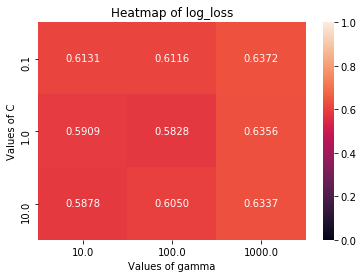

Optimal (gamma, C) is: ( 100.0 ,  1.0 ), with cross-entropy: 0.58277227988
RBF SVM is okay, with log_loss:  0.56446299693


In [34]:
#Tries to find optimal C and gamma for rbf SVM, second round
#optimal gamma, c seems to be around 10^1~3, 10^-1~1, from the result of the first round(s). #THIS IS TORTURE
ls1 = np.logspace(-1,1,3)
ls2 = np.logspace(1,3,3)
scores = []
for c in ls1:
    score = []
    for g in ls2:
        avs = []
        for train_index, test_index in kf.split(X_tr):
            svc = SVC(kernel='rbf',gamma=g,C=c,probability=True,random_state=seed).fit(X_tr[train_index],y_tr[train_index])
            avs.append(log_loss(y_tr[test_index], svc.predict_proba(X_tr[test_index])))
        score.append(np.average(avs))
    scores.append(score)
sns.heatmap(scores,xticklabels=ls2, yticklabels=ls1, vmin=0., vmax=1., annot=True, fmt='.4f')
plt.xlabel("Values of gamma")
plt.ylabel("Values of C")
plt.title("Heatmap of log_loss")
plt.show()
index = np.unravel_index(np.argmin(scores),(3,3))
print("Optimal (gamma, C) is: (", ls2[index[1]], ", ", ls1[index[0]], "), with cross-entropy:", scores[index[0]][index[1]])
svc8 = SVC(kernel='rbf',gamma=ls2[index[1]],C=ls1[index[0]],probability=True,random_state=seed).fit(X_tr,y_tr)

ce_svm_val = log_loss(y_val,svc8.predict_proba(X_val))
is_better = ce_svm_val < ce_dummy_val

if is_better:
    print("RBF SVM is okay, with log_loss: ", ce_svm_val)
    classifiers.append(svc8)
    classifiers_description.append("RBF SVM with (gamma, C): (" + str(ls2[index[1]])+ ", "+str(ls1[index[0]])+")")
    classifiers_ce.append(ce_svm_val)
else: 
    print("RBF SVM is bad")

POLY SVM is okay, with log_loss:  0.692959125448


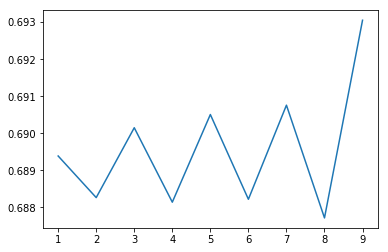

In [35]:
#Tries Polynomial kernel.
scores = []
for train_index, test_index in kf.split(X_tr):
    score = []
    for i in np.arange(1,10):
        svc9 = SVC(kernel='poly',degree=i,probability=True,random_state=seed).fit(X_tr[train_index],y_tr[train_index])
        score.append(log_loss(y_tr[test_index], svc9.predict_proba(X_tr[test_index])))
    scores.append(score)
best_value = np.argmin(np.mean(scores,0)) + 1
plt.plot(np.arange(1,10),np.mean(scores,0))

svc9 = SVC(kernel='poly',degree=best_value,probability=True,random_state=seed).fit(X_tr,y_tr)
ce_svm_val = log_loss(y_val,svc9.predict_proba(X_val))
is_better = ce_svm_val < ce_dummy_val

if is_better:
    print("POLY SVM is okay, with log_loss: ", ce_svm_val)
    classifiers.append(svc9)
    classifiers_description.append("POLY SVM with degree: " + str(best_value))
    classifiers_ce.append(ce_svm_val)
else: 
    print("POLY SVM is bad")

In [36]:
print("Total amount of classifiers used: ",len(classifiers))
print("Classifiers used: ")
for cls in classifiers_description:
    print("\t",cls)
print("Classifiers cross-entropy: ")
print("\t",classifiers_ce)

Total amount of classifiers used:  5
Classifiers used: 
	 Logistic Regression with Optimal C
	 Random Forest with Seed 420
	 Linear SVM
	 RBF SVM with (gamma, C): (100.0, 1.0)
	 POLY SVM with degree: 8
Classifiers cross-entropy: 
	 [0.59809379553600472, 0.58463161695461197, 0.69225543566887793, 0.56446299693034763, 0.69295912544755933]


In [37]:
best_index = best_value = np.argmin(classifiers_ce)
best_classifier = classifiers[best_index]
print("Best classifier found is: ", classifiers_description[best_index])
print("\twith Cross-Entropy: ", classifiers_ce[best_index])
test_images_partB_pred_proba = best_classifier.predict_proba(X_test)
print(test_images_partB_pred_proba.shape)

Best classifier found is:  RBF SVM with (gamma, C): (100.0, 1.0)
	with Cross-Entropy:  0.56446299693
(1114, 2)


In [38]:
# Execute this cell to export your results
from numpy import savetxt
def save_predictions(pred_proba):
    if pred_proba.shape != (1114,2):
        raise ValueError('Predicted probabilities array is not the right shape.')
    
    savetxt('assignment_3_predictions.txt', pred_proba)

# You need to replace "test_images_partB_pred_proba"
# with the name of the array which contains the probability 
# estimates for the data in the test set.
save_predictions(test_images_partB_pred_proba) 

<font color="red">TASK MARK: 11.0</font><br/><font color="green">COMMENT: Pretty good.  Your solution wasnt quite as good as my Random Forest baseline...but it was damn close. I fitted the Random Forest model out of the box with minimal tuning (I increased number of trees and performed a short search for a good value for max_features). I would always recommend this model for tabular data as your first step after a Dummy Baseline. This model got a logloss of 0.5965.<br/><br/>- JO</font>

<font color="red">TASK MARK: 12.0</font><br/><font color="green">COMMENT: good analysis</font>

In [2]:
import glob
import json
import os
import re
mark_re = re.compile("<font color=['\"]red['\"]>TASK MARK:\s*([\d\.]+)\s*</font>")
nb_file = glob.glob(os.path.join(os.getcwd(),'*.ipynb'))[0]
with open(nb_file) as f: nb_data = json.load(f)
matches = [mark_re.search(str(cell['source'])) for cell in nb_data['cells']]
mark_ls = sum([float(m.group(1)) for m in matches if m])
mark_ls = ('%f' % mark_ls).rstrip('0').rstrip('.')
print('<font color="red">TOTAL: {}/100</font>\n<br>\n<font color="green">COMMENT: -</font>'.format(mark_ls))

<font color="red">TOTAL: 82/100</font>
<br>
<font color="green">COMMENT: -</font>


<font color="red">TOTAL: 82/100</font>
<br>
<font color="green">COMMENT: -</font>

# Appendix

## More information about visual words

Visual words are based on [Scale-invariant feature transforms (SIFT)](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform). SIFT features are essentially local orientation histograms and capture the properties of small image regions. They possess attractive invariance properties which make them well suited for our task (you can read more about SIFT features in [D.Lowe, IJCV 60(2):91- 110, 2004](http://link.springer.com/article/10.1023/B:VISI.0000029664.99615.94), but the details don't matter for the purpose of this assignment). Each SIFT feature is a 128 dimensional vector. From each image many SIFT features are extracted, typically > 2500 per image (features are extracted at regular intervals using a 15 pixel grid and at 4 different scales). To obtain visual words a representative subset of all extracted SIFT features from all images is chosen and clustered with k-means using 500 centres (such use of the k-means algorithm will be discussed in detail during the lecture). These 500 cluster centres form our visual words. The representation of a single image is obtained by first assigning each SIFT feature extracted from the image to the appropriate cluster (i.e. we determine the visual word corresponding to each feature by picking the closest cluster centre). We then count the number of features from that image assigned to each cluster (i.e. we determine how often each visual word is present in the image). This results in a 500 dimensional count vector for each image (one dimension for each visual word). The normalized version of this count vector gives the final representation of the image (normalized means that we divide the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image)